# 2. Visualización de los datos 

###### En este notebook, se procederá a la visualización de los datos de entrenamiento, con el objetivo de poder analizar de manera gráfica los distintos datos que se disponen. Previamente, los datos deben de haber sido tratados por el notebook "Clean Words".

In [1]:
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path
from keras.preprocessing.text import Tokenizer
from tqdm import tqdm
import ast
from collections import Counter


Using TensorFlow backend.


In [2]:
nameTrainCSV = 'trainWithListOfCleanWords'

train = pd.read_csv('../data/processed/' + nameTrainCSV + '.csv', encoding='utf-8')
train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,listOfCleanWords,cleanWordsAsText
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"['explanation', 'edit', 'make', 'username', 'h...",explanation edit make username hardcore metall...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"['aww', 'match', 'background', 'colour', 'seem...",aww match background colour seemingly stick th...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"['hey', 'man', 'really', 'try', 'edit', 'war',...",hey man really try edit war guy constantly rem...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"['make', 'real', 'suggestions', 'improvement',...",make real suggestions improvement wonder secti...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page']",sir hero chance remember page


In [3]:
for x in tqdm(range(len(train))):
    train.set_value(col='listOfCleanWords',
                index=x,
                value=ast.literal_eval(train["listOfCleanWords"][x]))
    train.set_value(col='cleanWordsAsText',
                index=x,
                value=str(train["cleanWordsAsText"][x]))



 76%|███████▌  | 121179/159571 [00:09<00:03, 12168.81it/s]C:\Anaconda2\envs\py36\lib\site-packages\tqdm\_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 159571/159571 [00:13<00:00, 12197.99it/s]


In [4]:
nToxic = sum(train['toxic'])
nSevereToxic = sum(train['severe_toxic'])
nObscene = sum(train['obscene'])
nThreat = sum(train['threat'])
nInsult = sum(train['insult'])
nIdentityHate = sum(train['identity_hate'])


In [5]:
toxicity = np.array([nToxic, nSevereToxic, nObscene, nThreat, nInsult, nIdentityHate]) / len(train) * 100
N = len(toxicity)


In [6]:
toxicity

array([ 9.5844483 ,  0.99955506,  5.29482174,  0.29955318,  4.93636062,
        0.8804858 ])

In [7]:
np.arange(N)

array([0, 1, 2, 3, 4, 5])

## % de comentarios por clase

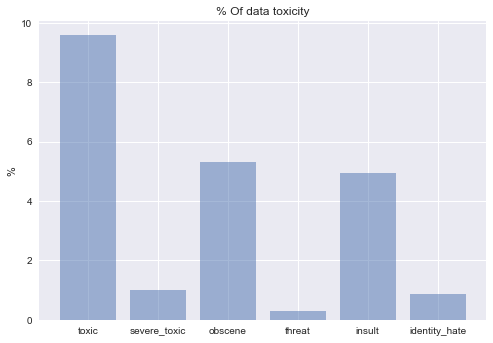

In [8]:
toxicLabels = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')
y_pos = np.arange(len(toxicLabels))
 
plt.bar(y_pos, toxicity, align='center', alpha=0.5)
plt.xticks(y_pos, toxicLabels)

plt.title('% Of data toxicity')
plt.ylabel('%')

plt.show()


# Toxicidad de ocurrencias por clase

> Se crea una nueva columna llamada clean la cual corresponde a las que no pertenece a ninguna de las 6 categorias

In [9]:
rowsums=train.iloc[:,2:].sum(axis=1)
train['clean']=(rowsums==0)
train['clean'].sum()

143346

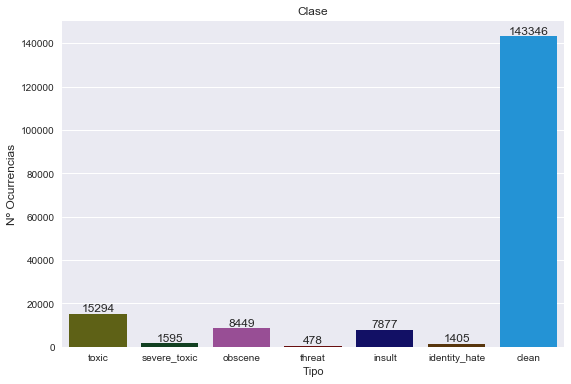

In [10]:
colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:8].sum()
x['clean'] = train['clean'].sum()
plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Clase")
plt.ylabel('Nº Ocurrencias', fontsize=12)
plt.xlabel('Tipo')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()


# Media de nº de letras por tamaño de documento

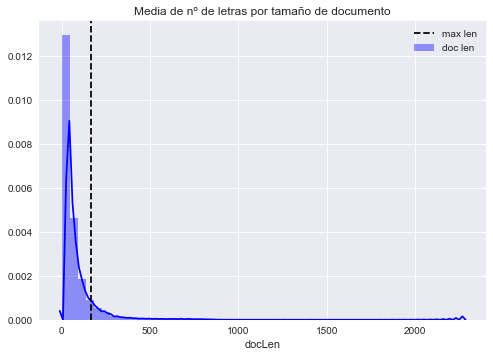

In [42]:
train['docLen'] = train['comment_text'].apply(lambda words: len(words.split(" ")))
max_seq_len = np.round(train['docLen'].mean() + train['docLen'].std()).astype(int)
sns.distplot(train['docLen'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('Media de nº de letras por tamaño de documento'); plt.legend()
plt.show()


# Palabras más frecuentes según la categoria

In [12]:
plt.figure(figsize=(10,10))
wikipedia_mask = np.array(Image.open("wikipediaMask.png"))
wc = WordCloud(background_color="Black", mask=wikipedia_mask)

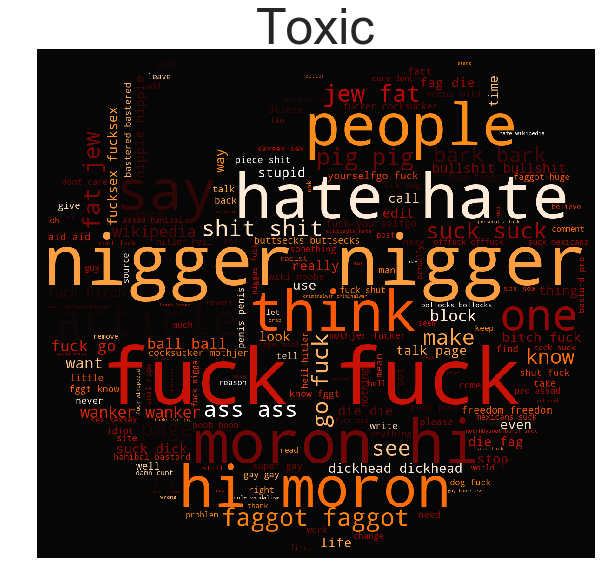

In [13]:
df = train[train.toxic == 1]
wc.generate(" ".join(df.cleanWordsAsText.values))
plt.title("Toxic", fontsize=50)
plt.imshow(wc.recolor(colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

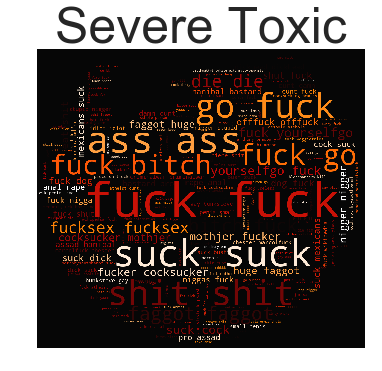

In [17]:
df = train[train.severe_toxic == 1]
wc.generate(" ".join(df.cleanWordsAsText))
plt.title("Severe Toxic", fontsize=50)
plt.imshow(wc.recolor( colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

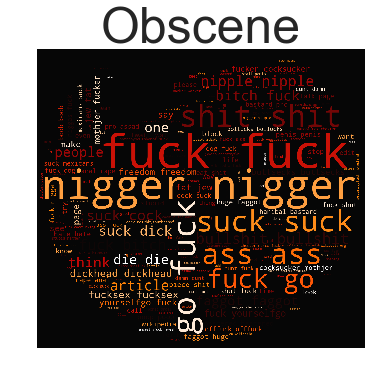

In [18]:
df = train[train.obscene == 1]
wc.generate(" ".join(df.cleanWordsAsText))
plt.title("Obscene", fontsize=50)
plt.imshow(wc.recolor( colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

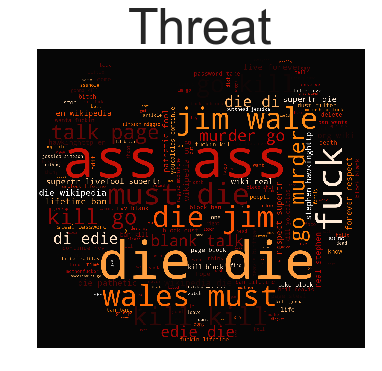

In [19]:
df = train[train.threat == 1]
wc.generate(" ".join(df.cleanWordsAsText))
plt.title("Threat", fontsize=50)
plt.imshow(wc.recolor( colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

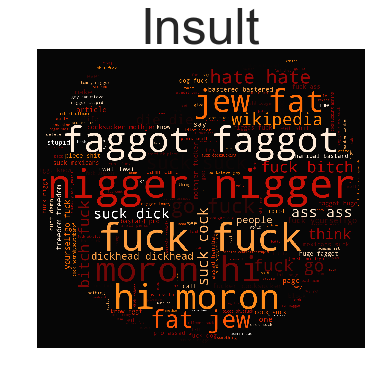

In [20]:
df = train[train.insult == 1]
wc.generate(" ".join(df.cleanWordsAsText))
plt.title("Insult", fontsize=50)
plt.imshow(wc.recolor( colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

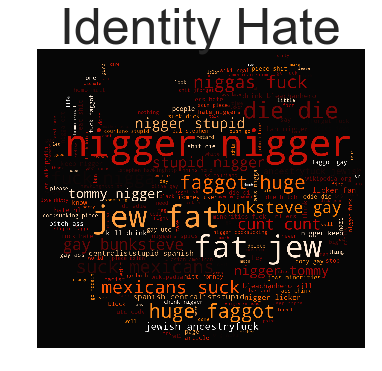

In [21]:
df = train[train.identity_hate == 1]
wc.generate(" ".join(df.cleanWordsAsText))
plt.title("Identity Hate", fontsize=50)
plt.imshow(wc.recolor( colormap= 'gist_heat' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()


# Palabras mas repetidas por categorias

### Toxic

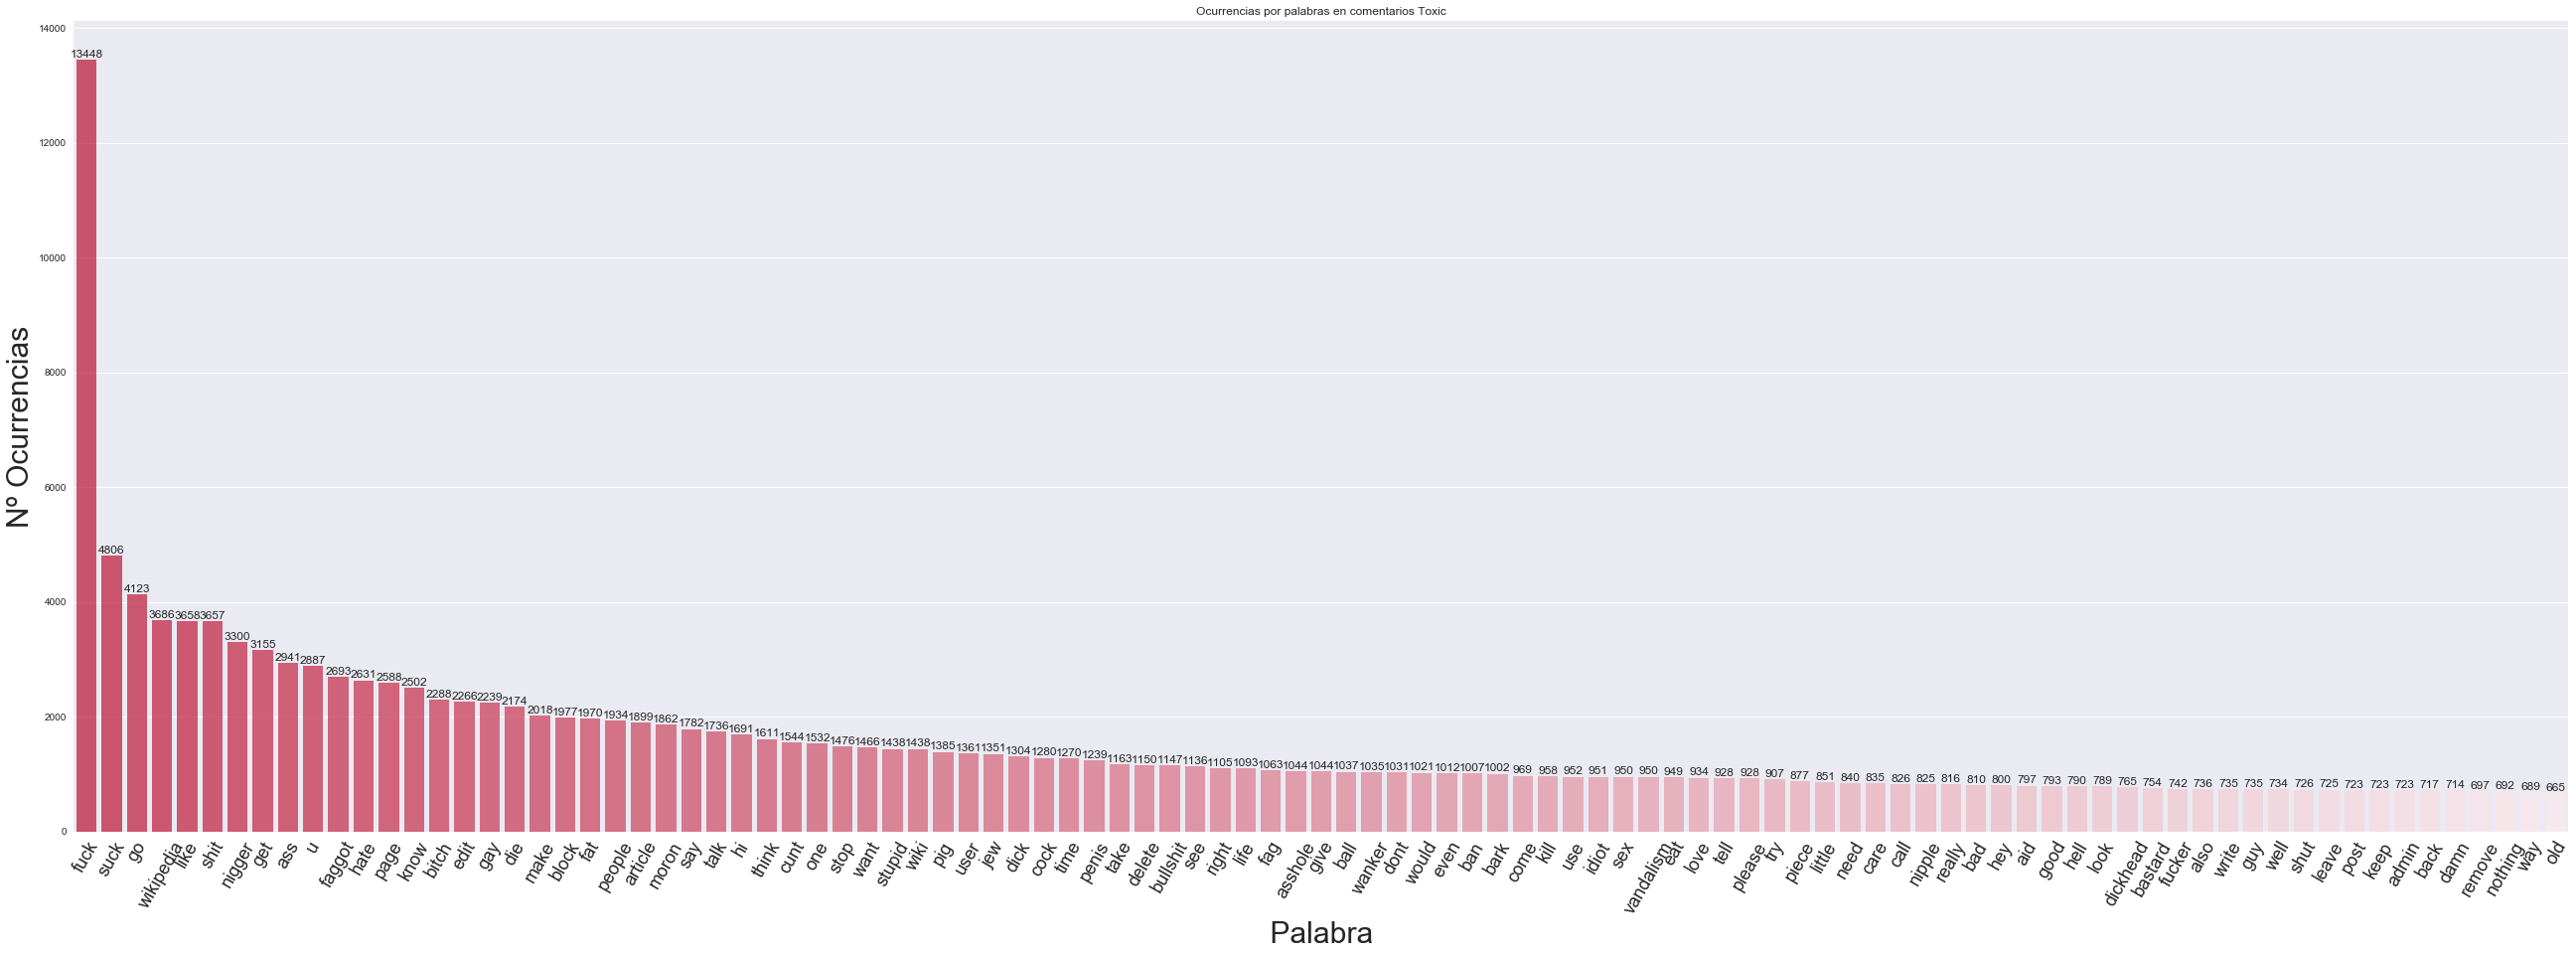

In [47]:
toxic=np.concatenate(train[train.toxic==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en comentarios Toxic")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

### Severe Toxic

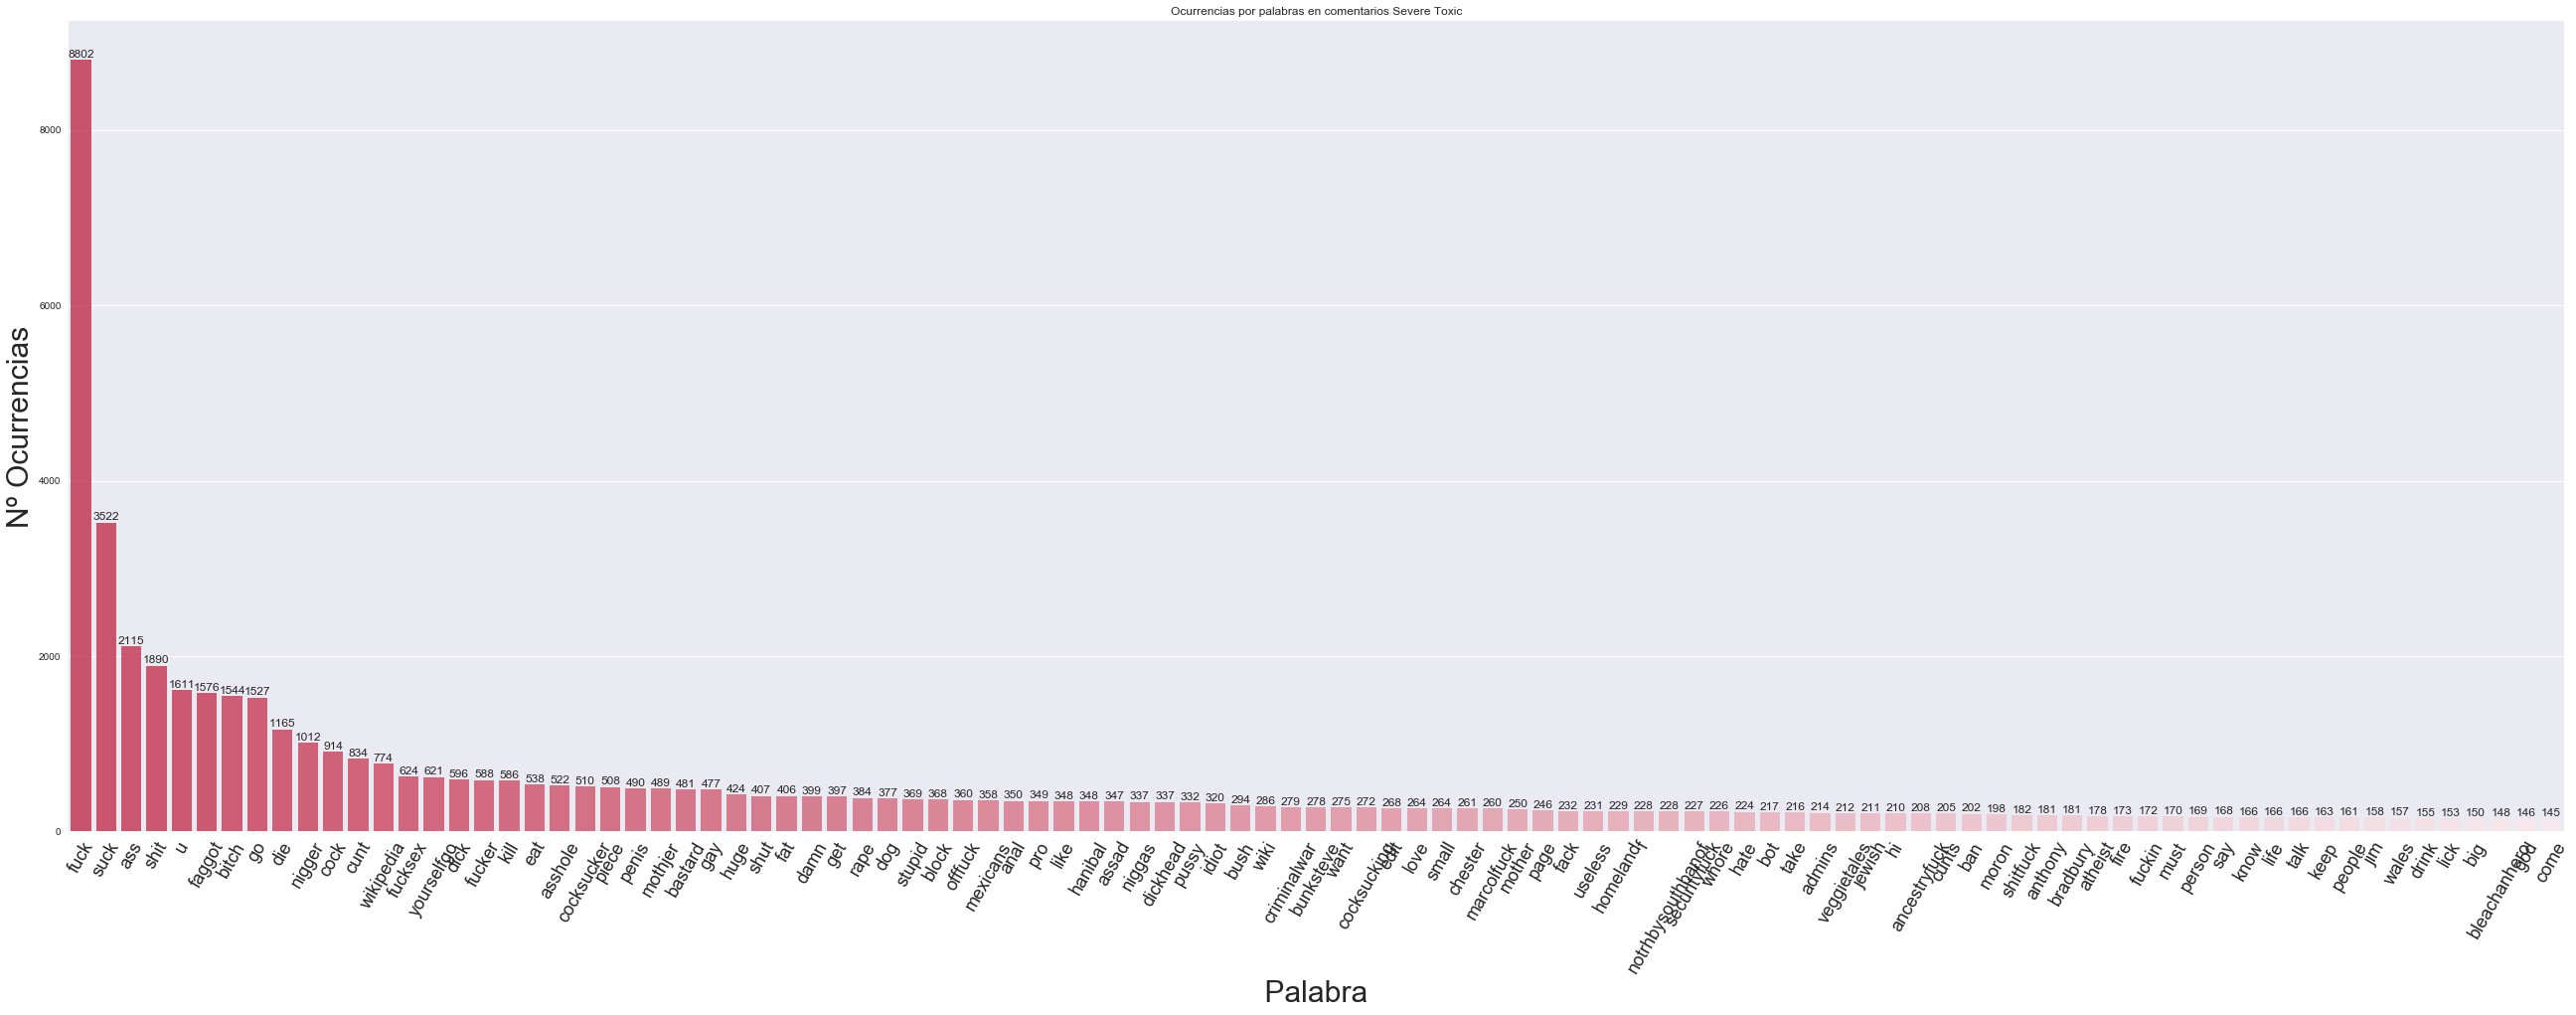

In [31]:
toxic=np.concatenate(train[train.severe_toxic==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en comentarios Severe Toxic")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

### Obscene

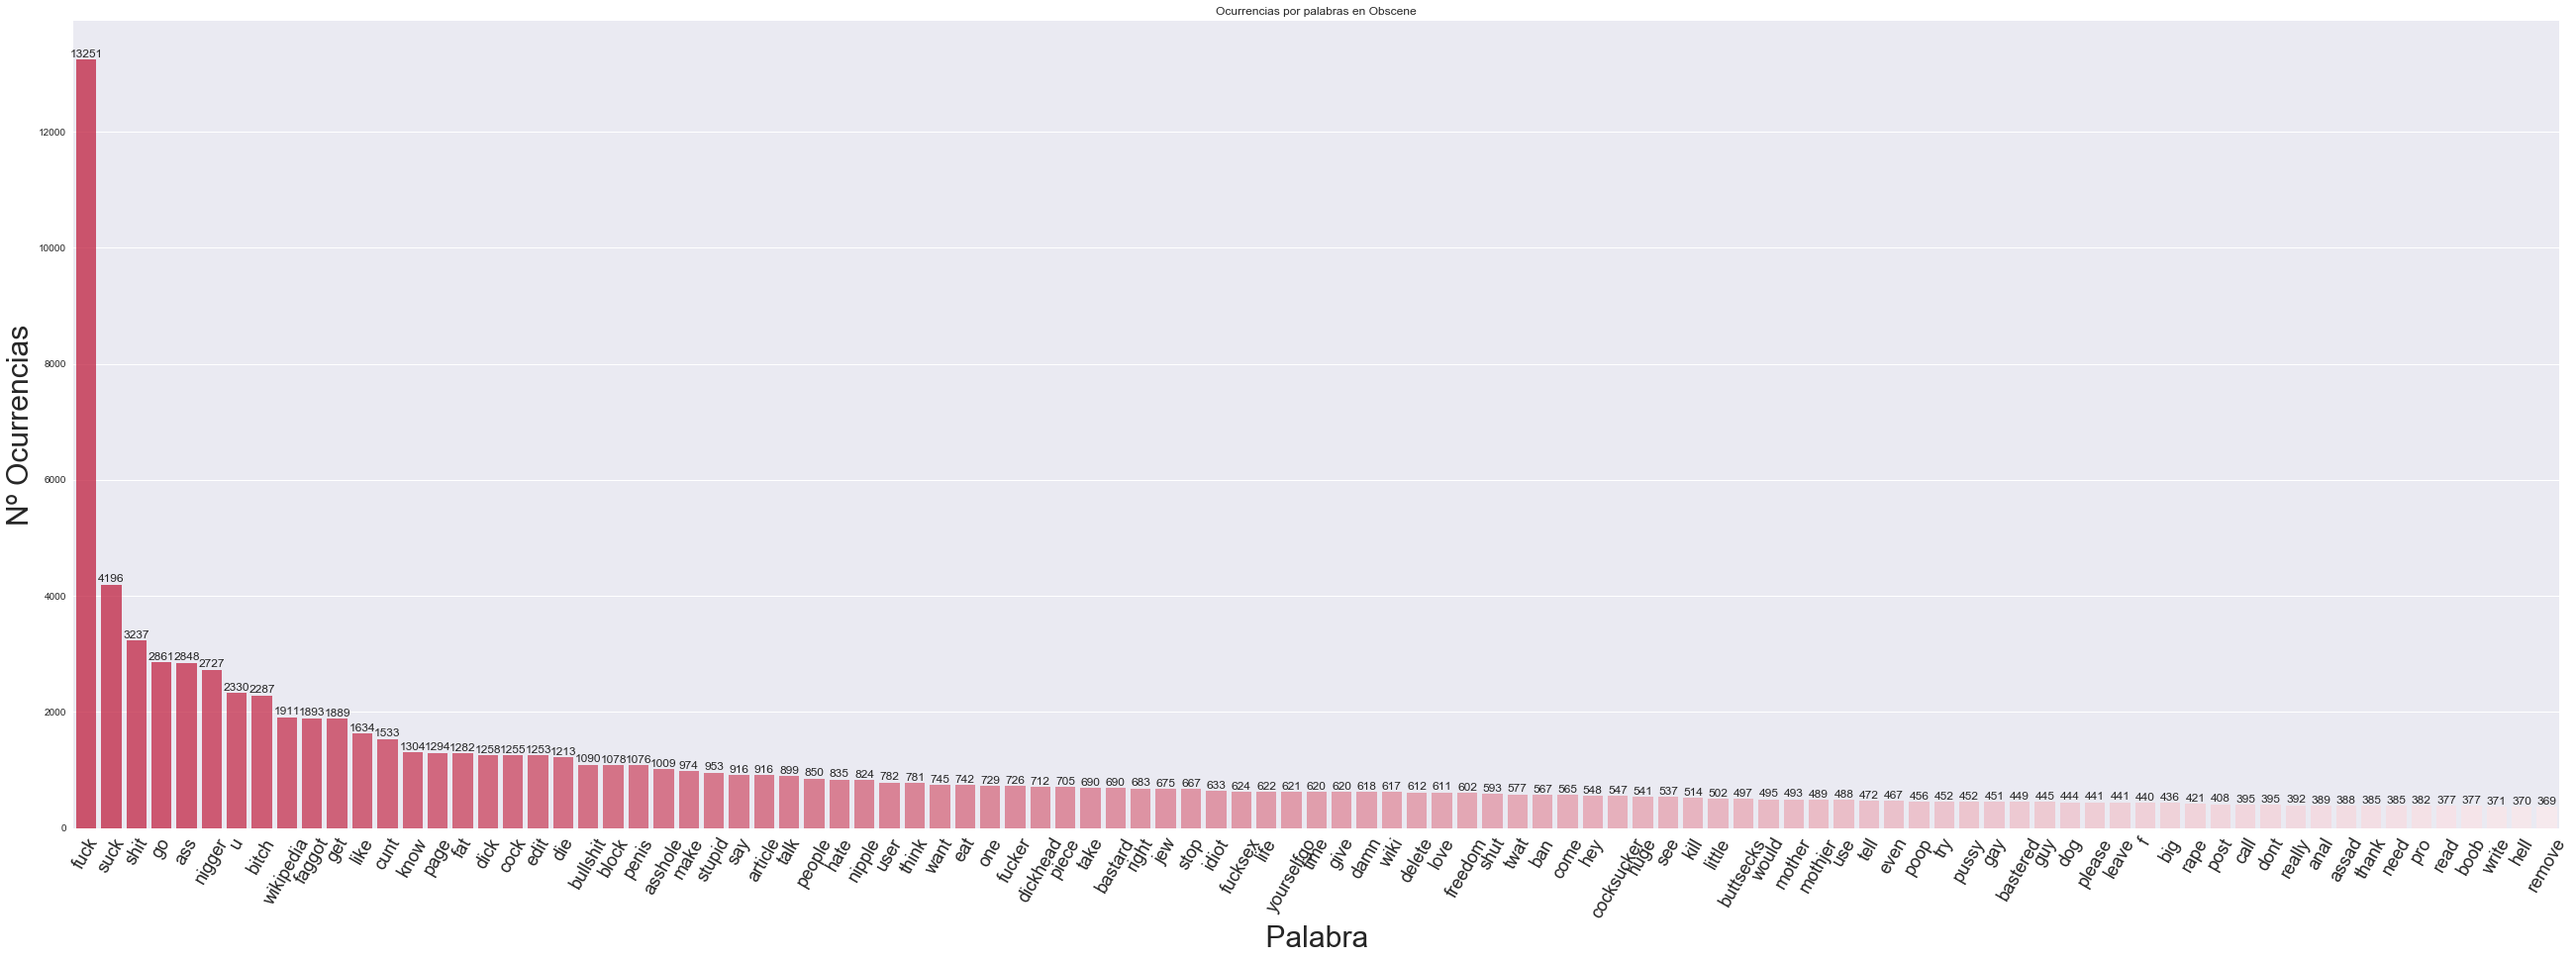

In [33]:
toxic=np.concatenate(train[train.obscene==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en Obscene")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

### Threat

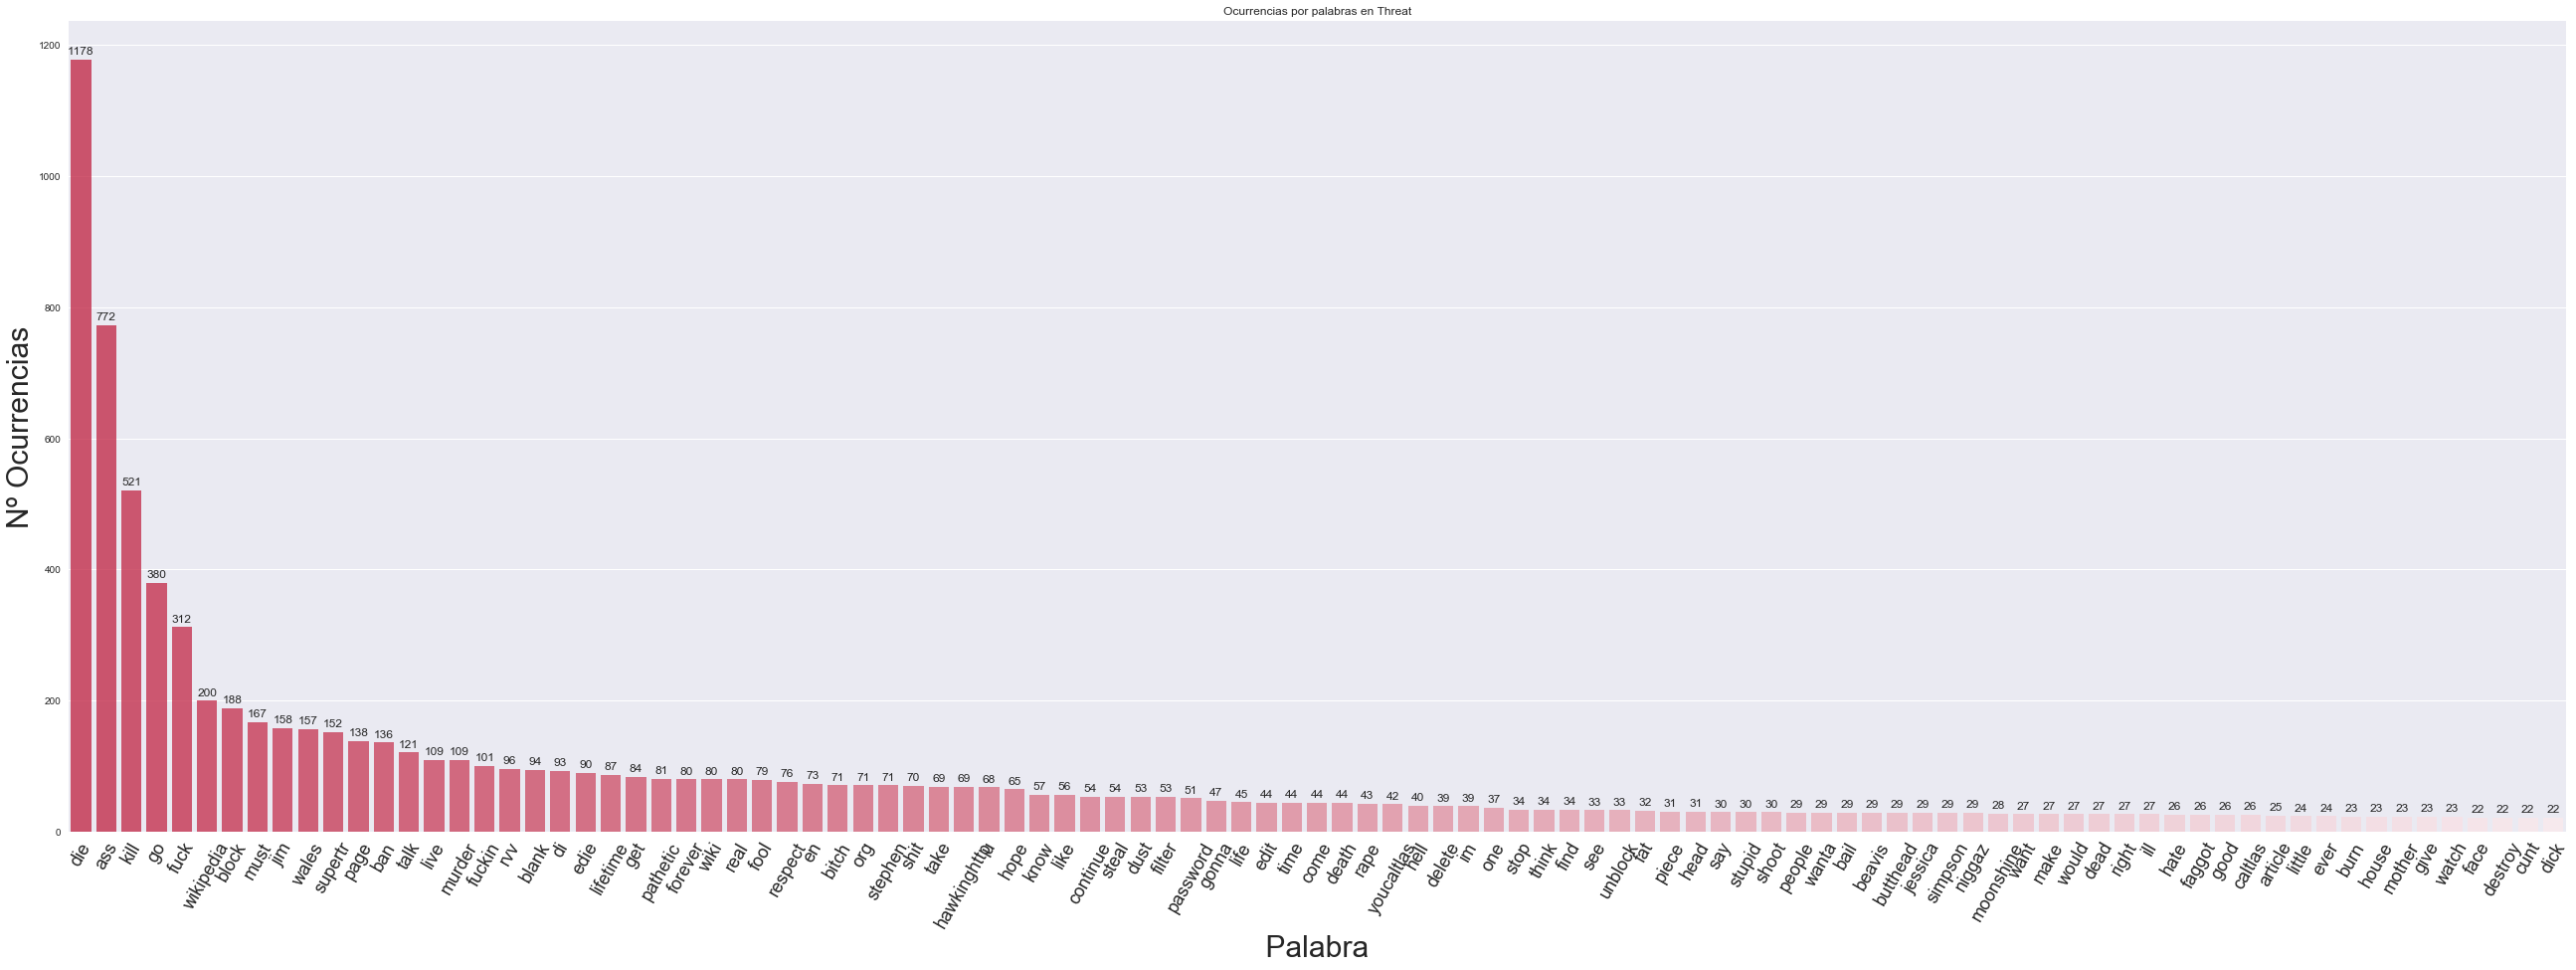

In [35]:
toxic=np.concatenate(train[train.threat==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en Threat")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

### Insult

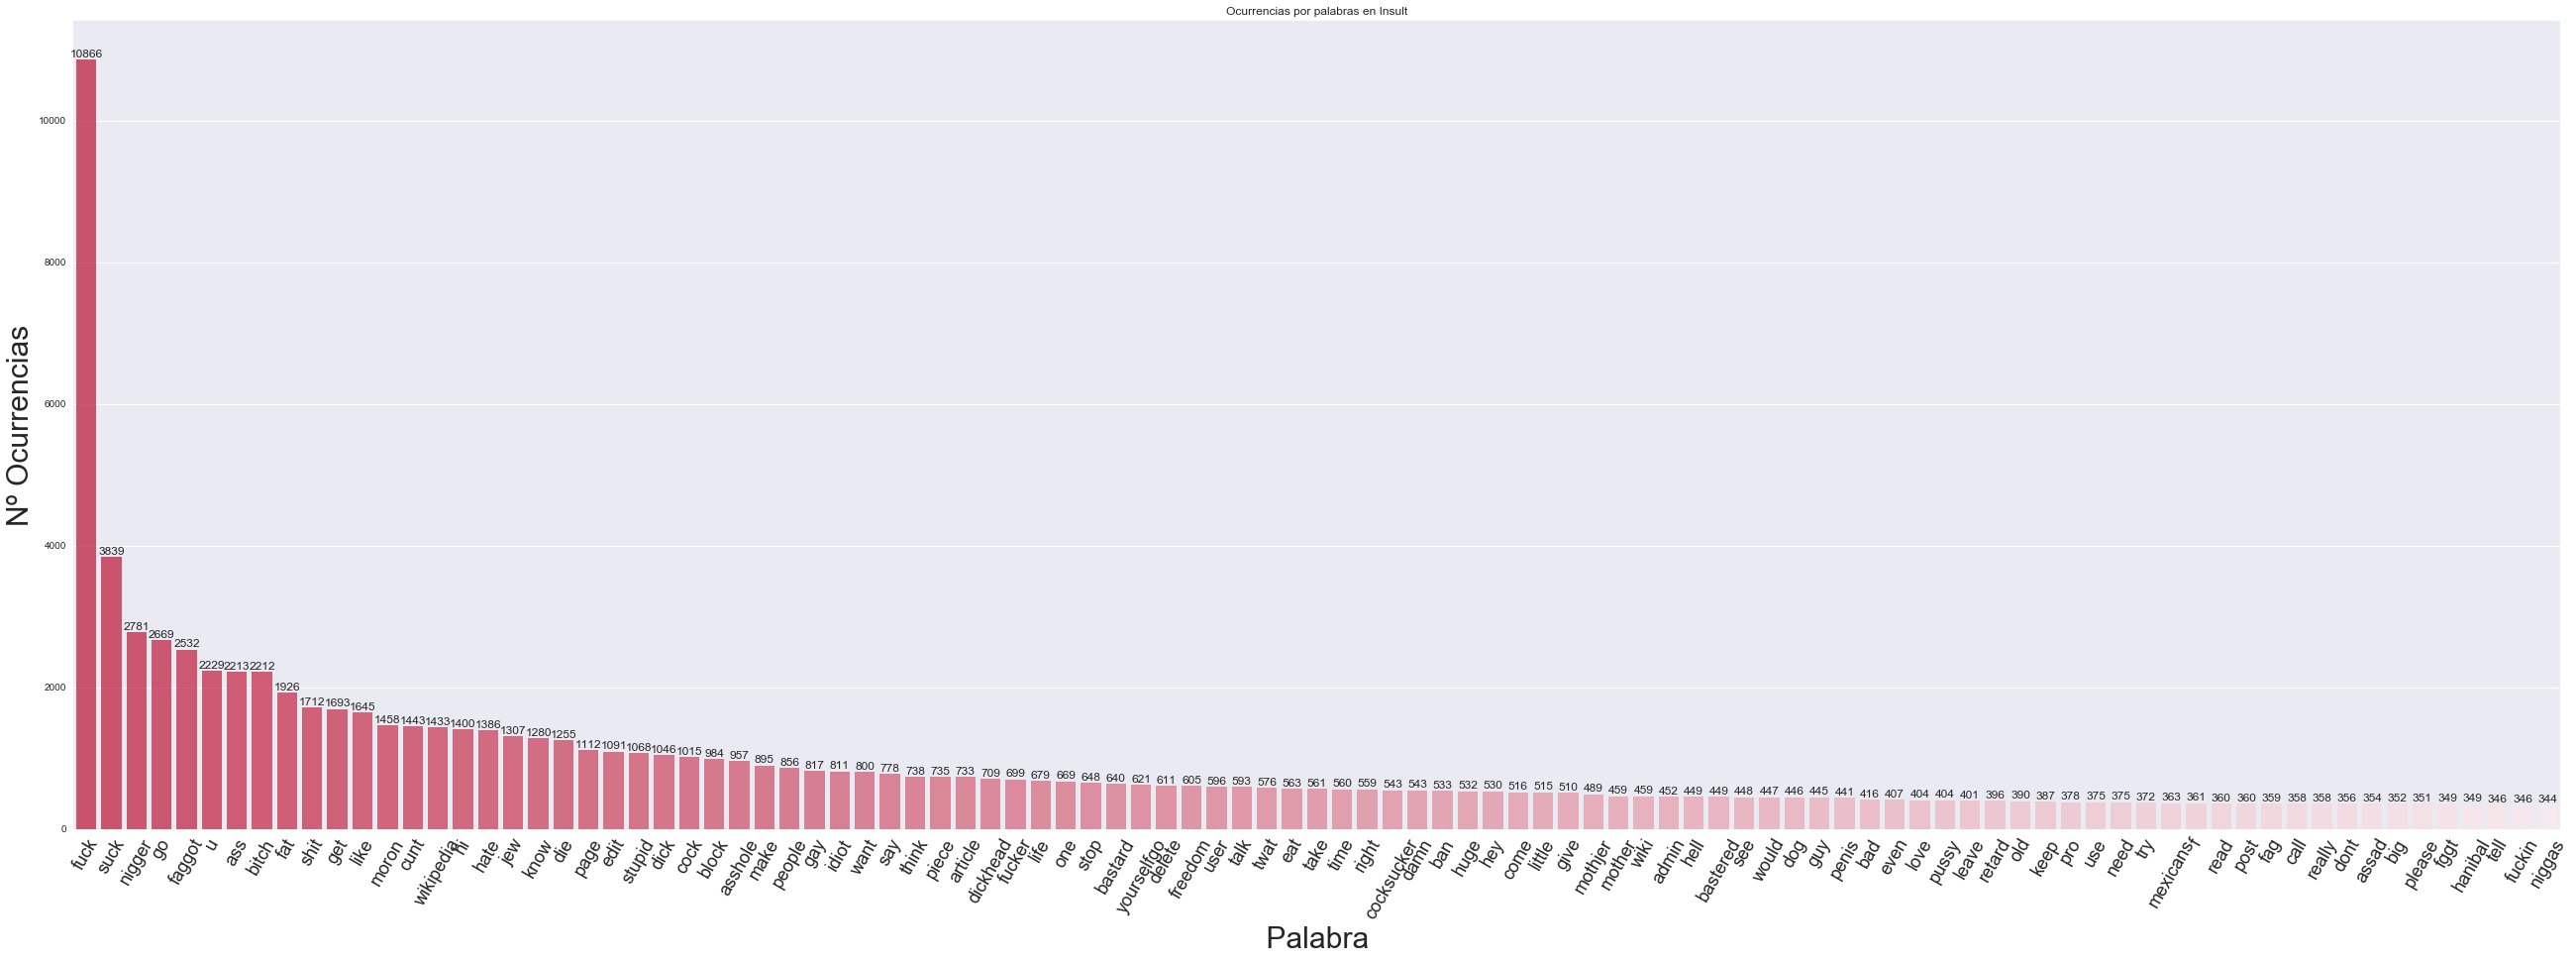

In [37]:
toxic=np.concatenate(train[train.insult==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en Insult")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()

### Identity Hate

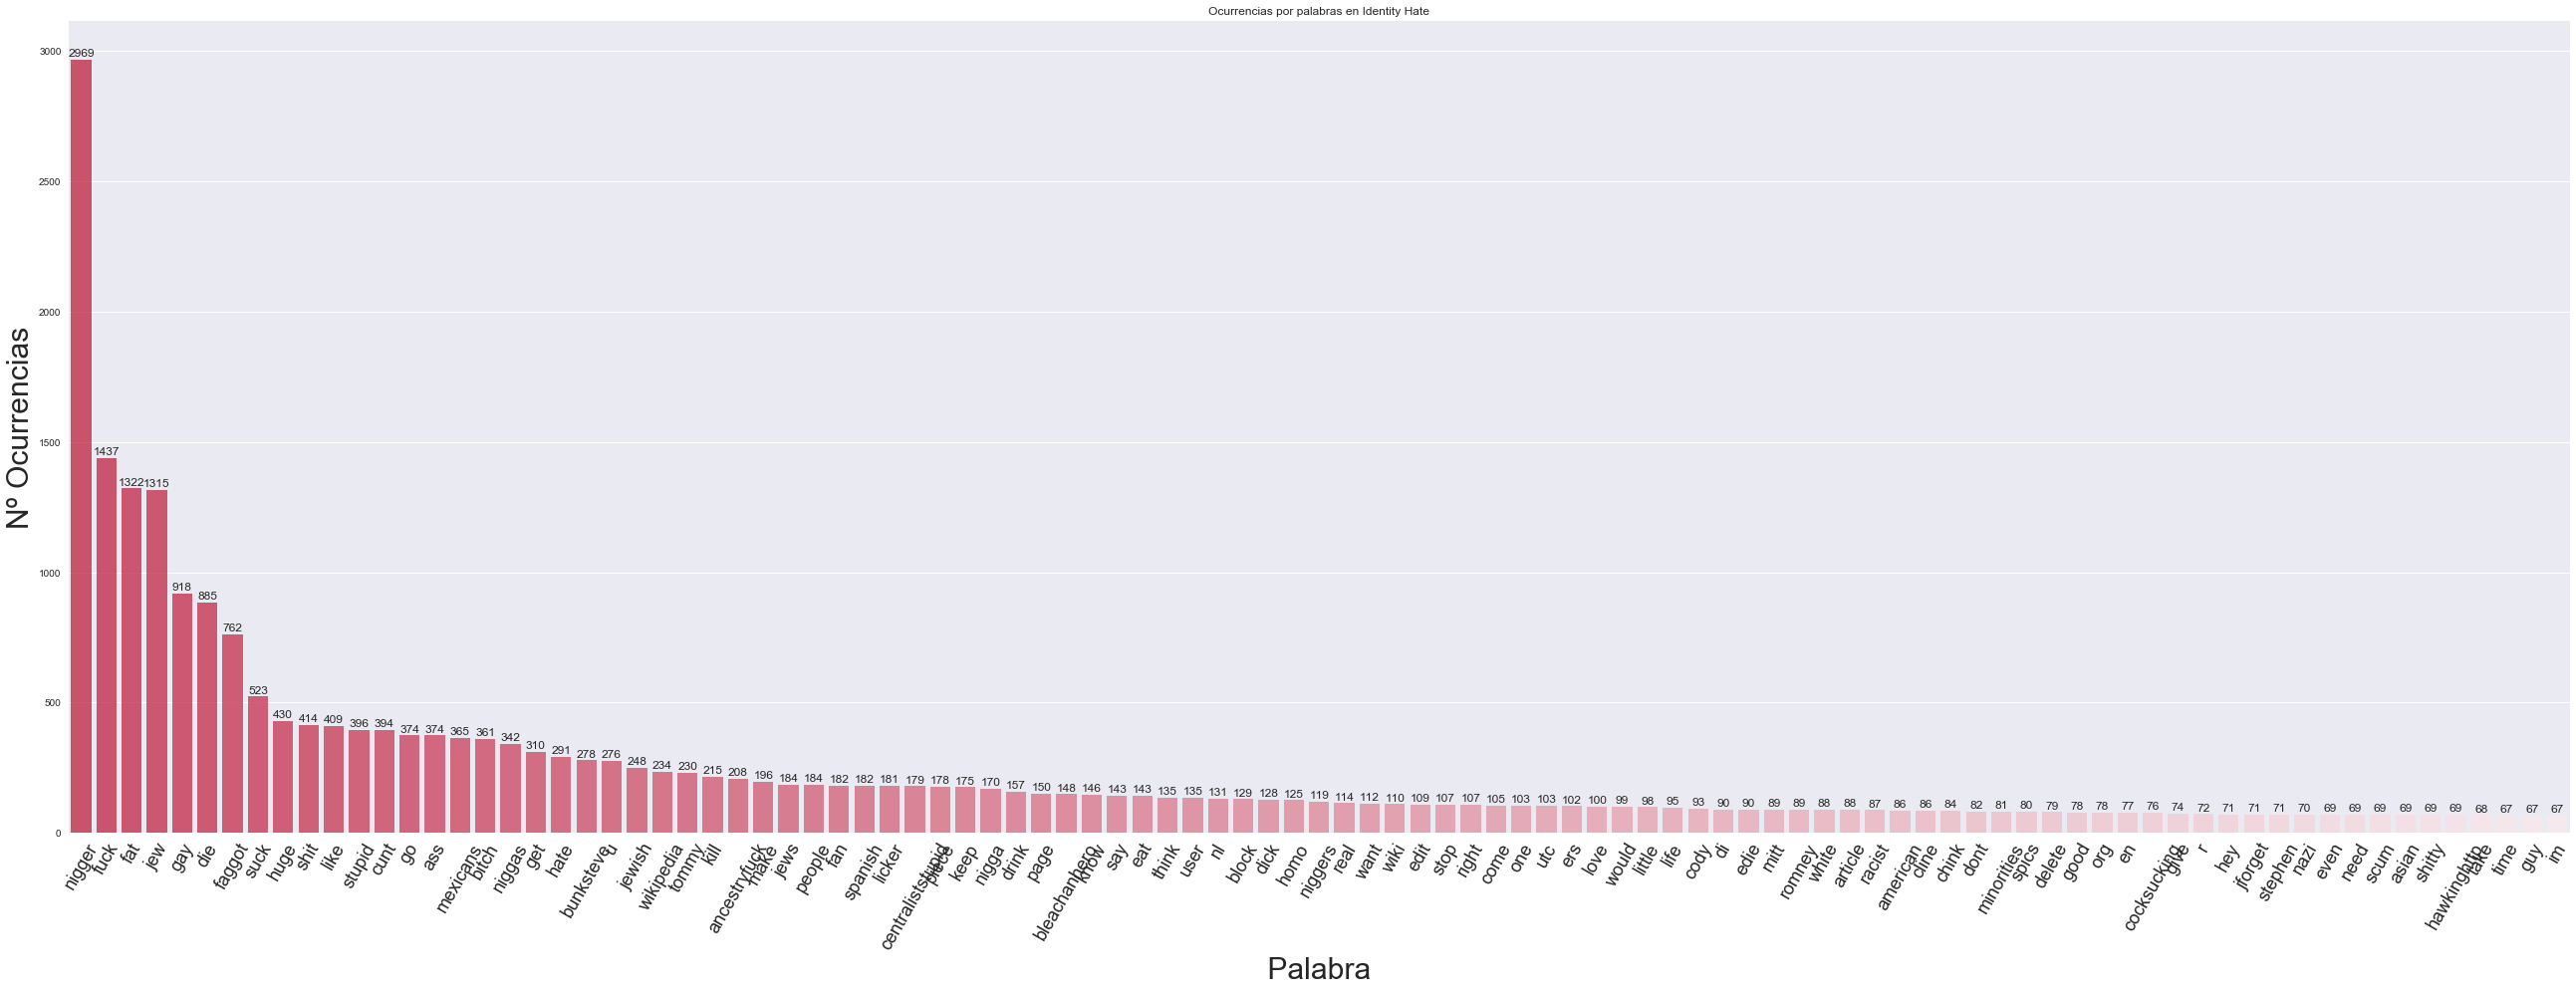

In [39]:
toxic=np.concatenate(train[train.identity_hate==1]['listOfCleanWords'].values)
fd=nltk.FreqDist(word for word in toxic)
x=[fd.most_common(150)[i][0] for i in range(99)]
y=[fd.most_common(150)[i][1] for i in range(99)]
#palette=sns.color_palette("PuBuGn_d",100)
palette= sns.light_palette("crimson",100,reverse=True)
plt.figure(figsize=(45,15))
ax= sns.barplot(x, y, alpha=0.8,palette=palette)
plt.title("Ocurrencias por palabras en Identity Hate")
plt.ylabel('Nº Ocurrencias', fontsize=30)
plt.xlabel(' Palabra ', fontsize=30)

rects = ax.patches
labels = y
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    plt.xticks(rotation=60, fontsize=18)
plt.show()